In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


In [14]:
warnings.filterwarnings("ignore")

In [15]:
df=pd.read_csv("EV_STATS.csv")
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0


In [16]:
df.describe()

,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1777.354839,907.677419,7260.516129,46.451613,6811.032258,1.741935,16829.870968
std,5000.160994,2518.917378,20008.445495,131.491150,18941.726543,6.016465,46327.212405
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,22.000000,19.000000,94.000000,0.000000,236.500000,0.000000,665.000000
50%,463.000000,228.000000,2148.000000,1.000000,997.000000,0.000000,4234.000000
75%,1089.500000,767.500000,6639.000000,37.500000,5487.500000,0.000000,14951.500000
max,27549.000000,14069.000000,112538.000000,720.000000,105571.000000,27.000000,260863.000000


In [17]:
df.isnull().sum()

Sl. No                                                                1
State                                                                 1
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    4
Two Wheelers (Category L2 (CMVR))                                     4
Two Wheelers (Max power not exceeding 250 Watts)                      4
Three Wheelers (Category L5 slow speed as per CMVR)                   1
Three Wheelers (Category L5 as per CMVR)                              4
Passenger Cars (Category M1 as per CMVR)                              4
Buses                                                                 4
Total in state                                                        4
dtype: int64

In [25]:
# Drop rows with any NaN values
df = df.dropna()

# Identify columns with non-numeric data
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# Exclude non-numeric columns from mean calculation
numeric_mean = df.drop(columns=non_numeric_columns).mean()

# Replace NaN values with the mean of numeric columns
df.fillna(numeric_mean, inplace=True)

# Fill specific columns with 'Unknown'
columns_to_fill_unknown = [
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
    'Two Wheelers (Category L2 (CMVR))',
    'Two Wheelers (Max power not exceeding 250 Watts)',
    'Three Wheelers (Category L5 slow speed as per CMVR)',
    'Three Wheelers (Category L5 as per CMVR)',
    'Passenger Cars (Category M1 as per CMVR)',
    'Buses'
]

df[columns_to_fill_unknown].fillna('Unknown', inplace=True)


In [26]:
df.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

In [27]:
df.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

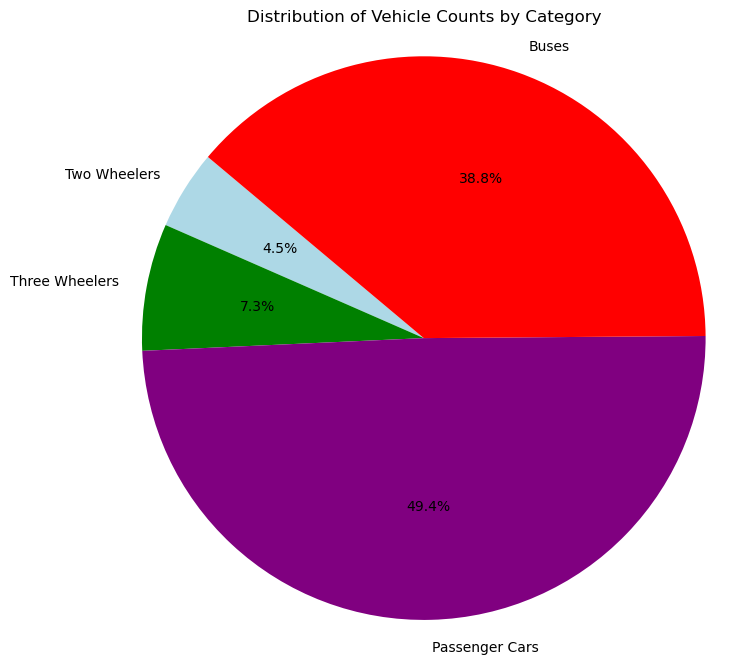

In [28]:

import matplotlib.pyplot as plt


categories = ['Two Wheelers', 'Three Wheelers', 'Passenger Cars', 'Buses']
counts = [431, 692, 4689, 3680]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'green', 'purple', 'red'])
plt.title('Distribution of Vehicle Counts by Category')
plt.axis('equal')  

plt.show()


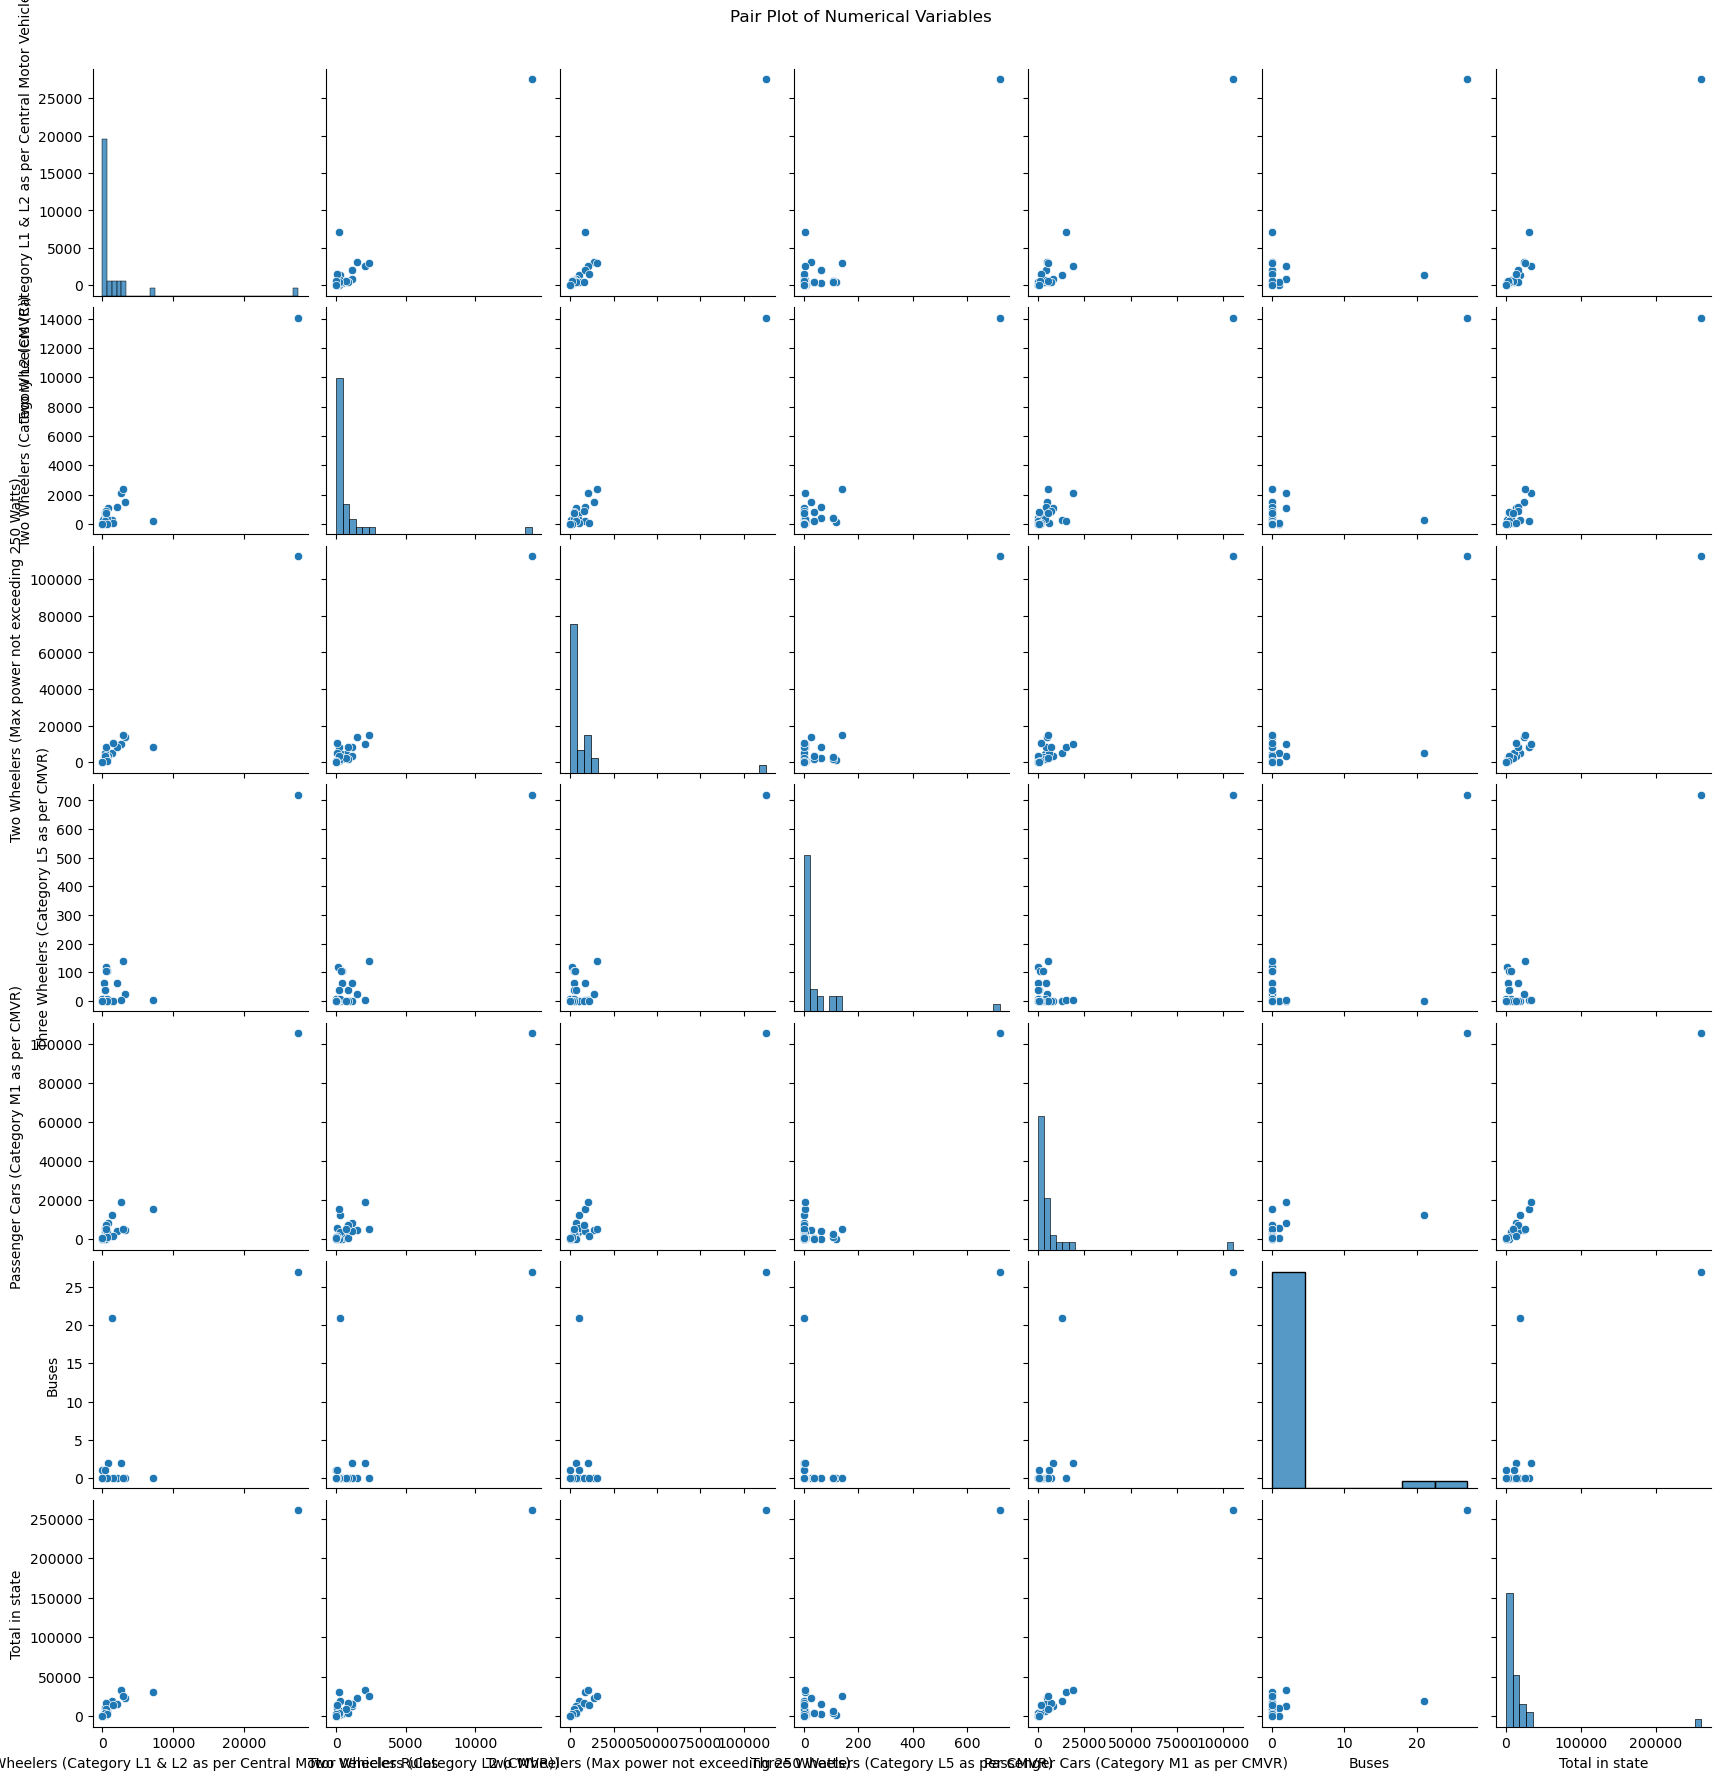

In [29]:
import seaborn as sns

# Select numerical columns for the pair plot
numerical_columns =( ['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'])
    

# Example pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


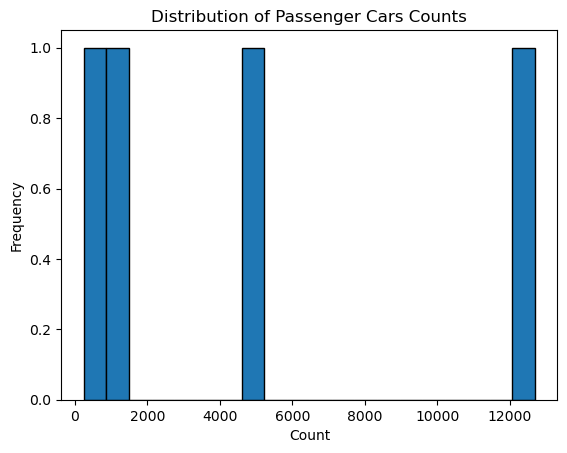

In [30]:
import matplotlib.pyplot as plt

passenger_cars_data = [1395, 251, 5018, 12695]

plt.hist(passenger_cars_data, bins=20, edgecolor='k')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Cars Counts')
plt.show()


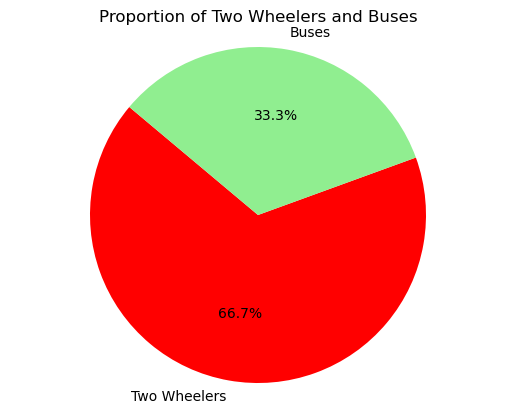

In [24]:
import matplotlib.pyplot as plt

# Sample data
two_wheelers_count = 1000
buses_count = 500
total_count = two_wheelers_count + buses_count

# Pie chart data
labels = ['Two Wheelers', 'Buses']
sizes = [two_wheelers_count / total_count, buses_count / total_count]
colors = ['red', 'lightgreen']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Two Wheelers and Buses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

